## Illustrative example for path finding

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

from itertools import permutations
from functions import *

In [2]:
# setup seed
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

SEED = 0
seed_everything(SEED)

In [3]:
simulations_list = []

#### Define random case

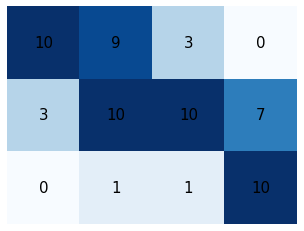

In [4]:
nc=4
nr=3

X = np.array([10,9,3,0,3,10,10,7,0,1,1,10]).reshape(nr,nc)

plt.imshow(X, cmap='Blues')
plt.axis('off')

for (j,i),label in np.ndenumerate(X):
    plt.text(i,j,label,ha='center',va='center', fontsize=15)

plt.savefig('figs/ex_normal.png')
plt.show()

### Get list of unique routes 
- Assume that we started from (0,0) to (2,3)
- Define 1 as rightward, -1 as downword

In [5]:
unique_routes = get_unique_routes(X)
unique_routes

array([[-1, -1,  1,  1,  1],
       [-1,  1, -1,  1,  1],
       [-1,  1,  1, -1,  1],
       [-1,  1,  1,  1, -1],
       [ 1, -1, -1,  1,  1],
       [ 1, -1,  1, -1,  1],
       [ 1, -1,  1,  1, -1],
       [ 1,  1, -1, -1,  1],
       [ 1,  1, -1,  1, -1],
       [ 1,  1,  1, -1, -1]])

In [6]:
unique_paths = get_path_from_routes(X, unique_routes)
unique_paths

[{'path_id': 0, 'path': [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3)]},
 {'path_id': 1, 'path': [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (2, 3)]},
 {'path_id': 2, 'path': [(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (2, 3)]},
 {'path_id': 3, 'path': [(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (2, 3)]},
 {'path_id': 4, 'path': [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3)]},
 {'path_id': 5, 'path': [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (2, 3)]},
 {'path_id': 6, 'path': [(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (2, 3)]},
 {'path_id': 7, 'path': [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3)]},
 {'path_id': 8, 'path': [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (2, 3)]},
 {'path_id': 9, 'path': [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3)]}]

### Get the route info
- Calculate the weight sum of each path
- Find the path with the largest weight sum

In [7]:
route_info_list = get_path_info_from_matrix(X)
route_info_list

(6,
 [{'path_id': 0,
   'path': [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3)],
   'sum_of_weight': 25},
  {'path_id': 1,
   'path': [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (2, 3)],
   'sum_of_weight': 35},
  {'path_id': 2,
   'path': [(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (2, 3)],
   'sum_of_weight': 44},
  {'path_id': 3,
   'path': [(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (2, 3)],
   'sum_of_weight': 50},
  {'path_id': 4,
   'path': [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3)],
   'sum_of_weight': 41},
  {'path_id': 5,
   'path': [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (2, 3)],
   'sum_of_weight': 50},
  {'path_id': 6,
   'path': [(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (2, 3)],
   'sum_of_weight': 56},
  {'path_id': 7,
   'path': [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3)],
   'sum_of_weight': 43},
  {'path_id': 8,
   'path': [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (2, 3)],
   'sum_of_weight': 49},
  {'path_id': 9,
   'path': [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), 

### Bayseian Bootstrap
- Conduct baysian bootstrap with B=1000
- Sample statistics find the largest weight sum route index
- Using Dirichlet prior and data $X$

In [8]:
boot_sample = bayesian_bootstrap(X, get_max_path_idx, 1000, unique_paths)

boot_sample_out = []
for idx in range(0,len(unique_routes)):
    boot_sample_out.append([idx, sum(np.asarray(boot_sample)==idx)])
boot_sample_out = np.vstack(boot_sample_out)
boot_sample_out

array([[  0,   1],
       [  1,   3],
       [  2,  26],
       [  3, 193],
       [  4,  16],
       [  5,  70],
       [  6, 468],
       [  7,  34],
       [  8, 186],
       [  9,   3]])

### Determine baseline
- The baseline route is determined by the sampling frequency
- **baseline**: Best route determined by bayesian bootstrap
- **max_weight_route**: Largest weight route with the constraints 

In [9]:
baseline = unique_paths[np.argmax(boot_sample_out[:,1])]
baseline

{'path_id': 6, 'path': [(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (2, 3)]}

In [10]:
max_weight_route = unique_paths[route_info_list[0]]
max_weight_route

{'path_id': 6, 'path': [(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (2, 3)]}

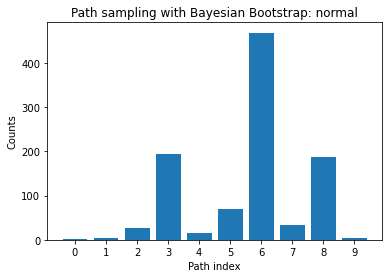

In [11]:
simulations_list.append(boot_sample_out)

plt.bar(boot_sample_out[:,0], boot_sample_out[:,1])
plt.title('Path sampling with Bayesian Bootstrap: normal')
plt.xlabel('Path index')
plt.ylabel('Counts')
plt.xticks(range(len(unique_paths)))
plt.savefig('figs/ex_normal_distribution.png')
plt.show()

## Robustness 

#### Noisy case

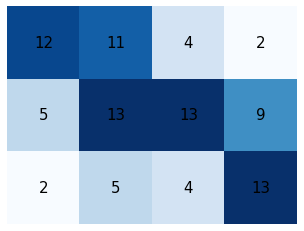

In [12]:
nc=4
nr=3

X = np.array([12,11,4,2,5,13,13,9,2,5,4,13]).reshape(nr,nc)

plt.imshow(X, cmap='Blues')
plt.axis('off')

for (j,i),label in np.ndenumerate(X):
    plt.text(i,j,int(label),ha='center',va='center', fontsize=15)

plt.savefig('figs/ex_noisy.png')
plt.show()

In [13]:
unique_routes = get_unique_routes(X)
unique_paths = get_path_from_routes(X, unique_routes)
#path_info_list = get_path_info_from_matrix(X)
boot_sample = bayesian_bootstrap(X, get_max_path_idx, 1000, unique_paths)

boot_sample_out = []
for idx in range(0,len(unique_routes)):
    boot_sample_out.append([idx, sum(np.asarray(boot_sample)==idx)])
boot_sample_out = np.vstack(boot_sample_out)

best_route = unique_paths[np.argmax(boot_sample_out[:,1])]

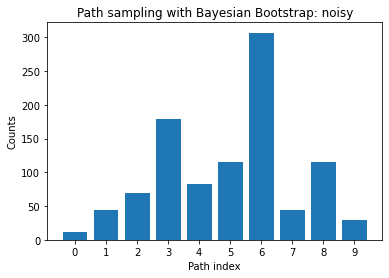

In [14]:
simulations_list.append(boot_sample_out)

plt.bar(boot_sample_out[:,0], boot_sample_out[:,1])
plt.title('Path sampling with Bayesian Bootstrap: noisy')
plt.xlabel('Path index')
plt.ylabel('Counts')
plt.xticks(range(len(unique_paths)))
plt.savefig('figs/ex_noisy_distribution.png')
plt.show()

## Data missing case

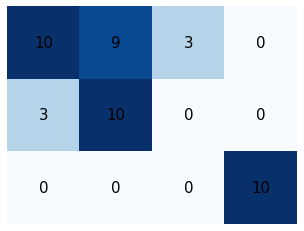

In [15]:
nc=4
nr=3

X = np.array([10,9,3,0,3,10,0,0,0,0,0,10]).reshape(nr,nc)

plt.imshow(X, cmap='Blues')
plt.axis('off')

for (j,i),label in np.ndenumerate(X):
    plt.text(i,j,int(label),ha='center',va='center', fontsize=15)

plt.savefig('figs/ex_missing.png')
plt.show()

In [16]:
unique_routes = get_unique_routes(X)
unique_paths = get_path_from_routes(X, unique_routes)
#path_info_list = get_path_info_from_matrix(X)
boot_sample = bayesian_bootstrap(X, get_max_path_idx, 1000, unique_paths)

boot_sample_out = []
for idx in range(0,len(unique_routes)):
    boot_sample_out.append([idx, sum(np.asarray(boot_sample)==idx)])
boot_sample_out = np.vstack(boot_sample_out)

best_route = unique_paths[np.argmax(boot_sample_out[:,1])]

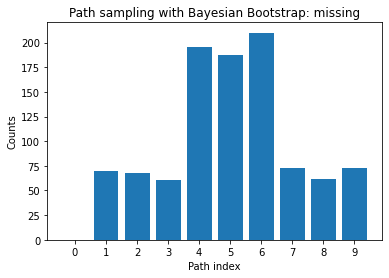

In [17]:
simulations_list.append(boot_sample_out)

plt.bar(boot_sample_out[:,0], boot_sample_out[:,1])
plt.title('Path sampling with Bayesian Bootstrap: missing')
plt.xlabel('Path index')
plt.ylabel('Counts')
plt.xticks(range(len(unique_paths)))
plt.savefig('figs/ex_missing_distribution.png')
plt.show()

## Compare results

In [18]:
result_normal = simulations_list[0]
result_noisy = simulations_list[1]
result_missing = simulations_list[2]

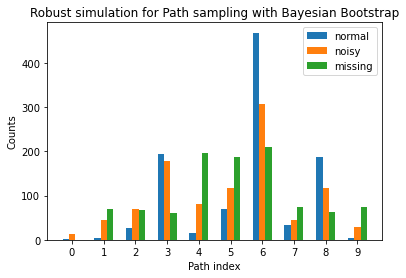

In [19]:
plt.bar(result_normal[:,0]-0.2, result_normal[:,1], width=0.2, align='center', label='normal')
plt.bar(result_noisy[:,0], result_noisy[:,1], width=0.2, align='center', label='noisy')
plt.bar(result_missing[:,0]+0.2, result_missing[:,1], width=0.2, align='center', label='missing')
plt.legend()

plt.title('Robust simulation for Path sampling with Bayesian Bootstrap')
plt.xlabel('Path index')
plt.ylabel('Counts')
plt.xticks(range(len(unique_paths)))
plt.savefig('figs/ex_simluation_comparison.png')
plt.show()

In [20]:
print('best_route selection probability for normal: \t{:.2f}%'.format(result_normal[6,1]/np.sum(result_normal[:,1])))
print('best_route selection probability for noisy: \t{:.2f}%'.format(result_noisy[6,1]/np.sum(result_noisy[:,1])))
print('best_route selection probability for missing: \t{:.2f}%'.format(result_missing[6,1]/np.sum(result_missing[:,1])))

best_route selection probability for normal: 	0.47%
best_route selection probability for noisy: 	0.31%
best_route selection probability for missing: 	0.21%
